# Exercise 1
# Book - First Contact with Tensorflow

source: book  

replicating the code here

(....)

### My first code TensorFlow

In [5]:
import tensorflow as tf

a = tf.placeholder('float')
b = tf.placeholder('float')

y = tf.multiply(a,b) # tf.mul doesn't exist anymore. replaced with tf.multiply

sess = tf.Session()

print(sess.run(y, feed_dict = {a:3, b:3})) #original, in the book, we had:  printsess.run(y.....) wired

9.0


## 2. Linear Regression in TensorFlow
### Model of relationship between variables

In [12]:
import numpy as np

num_points = 1000
vectors_set = []
for i in range(num_points):  # in the book: xrange. was renamed with python3 to range()
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

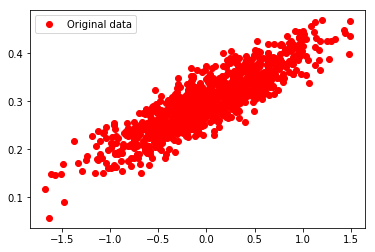

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_data, y_data, 'ro', label = 'Original data')
plt.legend()
plt.show()

### Cost function and gradient descent algorithm

In [16]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W*x_data + b

In [18]:
# cost function in tensorflow:
loss = tf.reduce_mean(tf.square(y - y_data))

In [19]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train     = optimizer.minimize(loss)

### Running the algorithm

In [22]:
# init = tf.initialize_all_variables()
init = tf.global_variables_initializer()


sess = tf.Session()
sess.run(init)

In [23]:
for step in range(8):
    sess.run(train)
    
print(step, sess.run(W), sess.run(b))

7 [0.11159594] [0.30043256]


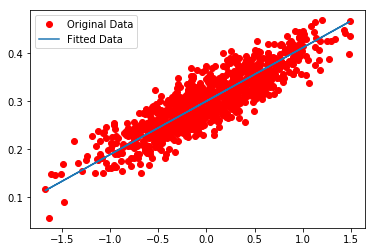

In [25]:
plt.plot(x_data, y_data, 'ro', label='Original Data')
plt.plot(x_data, sess.run(W)*x_data + sess.run(b), label='Fitted Data')
plt.legend()
plt.show()

In [26]:
print(sess, sess.run(W), sess.run(b))

<tensorflow.python.client.session.Session object at 0x0000020C7FD9DB70> [0.11159594] [0.30043256]


In [27]:
print(step, sess.run(loss))

7 0.00092900643


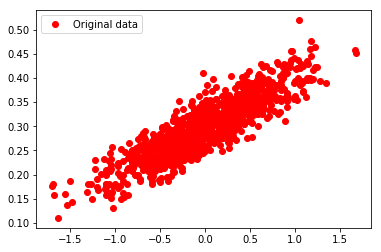

0 [0.40059224] [0.31061524]
0 0.02846225


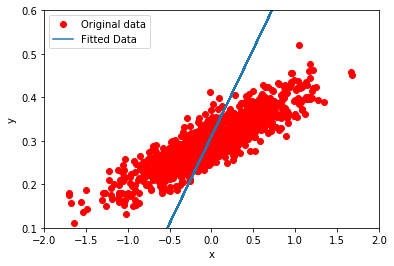

1 [0.30892712] [0.30731186]
1 0.014200232


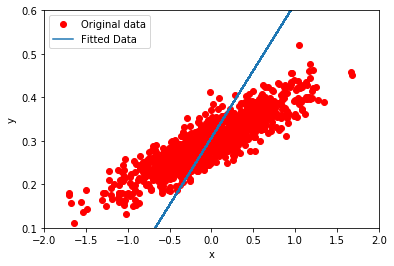

2 [0.24519964] [0.30518526]
2 0.0073082005


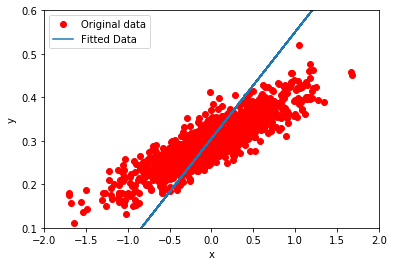

3 [0.20089892] [0.3037068]
3 0.0039776536


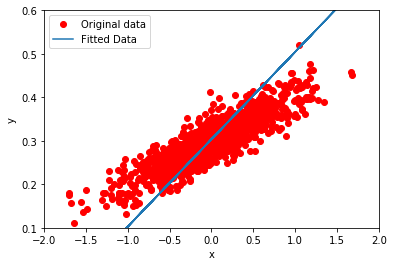

4 [0.17010286] [0.30267903]
4 0.0023681808


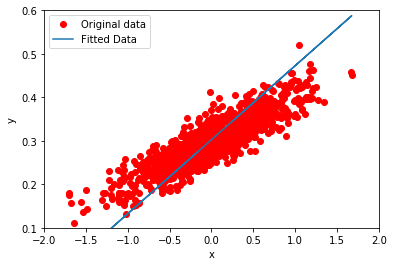

5 [0.14869472] [0.30196455]
5 0.0015904093


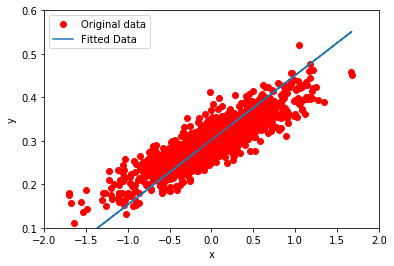

6 [0.13381267] [0.3014679]
6 0.001214555


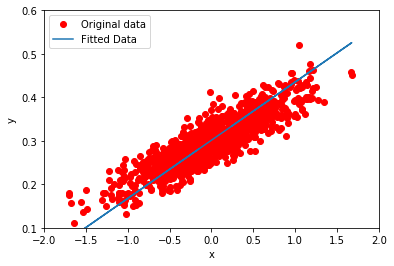

7 [0.12346727] [0.30112264]
7 0.001032925


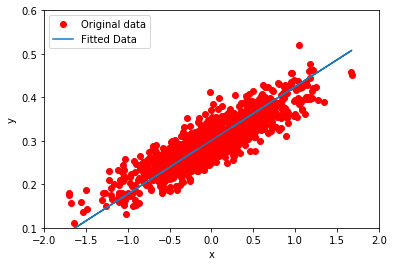

In [31]:
# in one go:
import numpy as np

num_points = 1000
vectors_set = []
for i in range(num_points):  # in the book: xrange. was renamed with python3 to range()
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_data, y_data, 'ro', label = 'Original data')
plt.legend()
plt.show()



W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W*x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train     = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b))
    print(step, sess.run(loss))
    
    #Graphic display
    plt.plot(x_data, y_data, 'ro', label = 'Original data')
    plt.plot(x_data, sess.run(W)*x_data + sess.run(b), label = 'Fitted Data')
    plt.xlabel('x')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    plt.legend()
    plt.show()